In [23]:
import json
import sounddevice as sd 
from scipy.io import wavfile
import numpy as np

import time
from IPython.display import Audio, display
import matplotlib.pyplot as plt

In [2]:
import os 

os.getcwd()

'c:\\git\\speech\\text-to-speech'

In [3]:
sd.query_devices()

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Surface Stereo Microphones (Sur, MME (2 in, 0 out)
   2 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  3 Surface Omnisonic Speakers (Sur, MME (0 in, 2 out)
   4 Primary Sound Capture Driver, Windows DirectSound (2 in, 0 out)
   5 Surface Stereo Microphones (Surface High Definition Audio), Windows DirectSound (2 in, 0 out)
   6 Primary Sound Driver, Windows DirectSound (0 in, 2 out)
   7 Surface Omnisonic Speakers (Surface High Definition Audio), Windows DirectSound (0 in, 2 out)
   8 Surface Omnisonic Speakers (Surface High Definition Audio), Windows WASAPI (0 in, 2 out)
   9 Surface Stereo Microphones (Surface High Definition Audio), Windows WASAPI (2 in, 0 out)
  10 Headphones 1 (Realtek HD Audio 2nd output with SST), Windows WDM-KS (0 in, 2 out)
  11 Headphones 2 (Realtek HD Audio 2nd output with SST), Windows WDM-KS (0 in, 2 out)
  12 PC Speaker (Realtek HD Audio 2nd output with SST), Windows WDM-KS (2 in, 0 out)
  

In [4]:

input_device = sd.query_devices(kind='input')
print(json.dumps(input_device, indent=4))

# input challens from the input device
input_channels = input_device['max_input_channels']
print(f"Input Channels: {input_channels}")

{
    "name": "Surface Stereo Microphones (Sur",
    "index": 1,
    "hostapi": 0,
    "max_input_channels": 2,
    "max_output_channels": 0,
    "default_low_input_latency": 0.09,
    "default_low_output_latency": 0.09,
    "default_high_input_latency": 0.18,
    "default_high_output_latency": 0.18,
    "default_samplerate": 44100.0
}
Input Channels: 2


In [5]:
sd.query_devices(kind='input')

{'name': 'Surface Stereo Microphones (Sur',
 'index': 1,
 'hostapi': 0,
 'max_input_channels': 2,
 'max_output_channels': 0,
 'default_low_input_latency': 0.09,
 'default_low_output_latency': 0.09,
 'default_high_input_latency': 0.18,
 'default_high_output_latency': 0.18,
 'default_samplerate': 44100.0}

The list of devices can also be displayed in a terminal:

`python3 -m sounddevice`

ref: https://python-sounddevice.readthedocs.io/en/0.5.1/api/checking-hardware.html#sounddevice.query_devices

In [6]:
max_duration = 10  # seconds
sample_rate = 44100  # Hz   
file_name="..\\wav\\testrecord.wav"

In [41]:
start_time = time.time()
    
recording = sd.rec(int(max_duration * sample_rate), samplerate=sample_rate, channels=1, dtype='int16')

while True:
    try:
        if input() == "":
            sd.stop()
            break
    except KeyboardInterrupt:
        sd.stop()
        break

# Stop the timer
end_time = time.time()
recording_duration = end_time - start_time
print(f"Recording finished. Duration: {recording_duration:.2f} seconds")

# Trim the recording to the actual duration
recording = recording[:int(recording_duration * sample_rate)]

Recording finished. Duration: 2.61 seconds


In [42]:
# Replay the recorded audio
print("Replaying the recorded message...")
sd.play(recording, samplerate=sample_rate)
sd.wait()  # Wait until the playback is finished
print("Playback finished.")


Replaying the recorded message...
Playback finished.


In [43]:
# Save the recording to a WAV file

wavfile.write(file_name, sample_rate, recording.astype(np.int16))
print(f"Recording saved to {file_name}")

Recording saved to ..\wav\testrecord.wav


In [44]:
print(recording)
print(recording.shape)

[[  -23]
 [    6]
 [   -2]
 ...
 [12102]
 [22631]
 [16968]]
(115238, 1)


In [45]:
samplerate, data= wavfile.read(file_name)
print(sample_rate)
print(data.shape)

44100
(115238,)


In [46]:
print(data)


[  -23     6    -2 ... 12102 22631 16968]


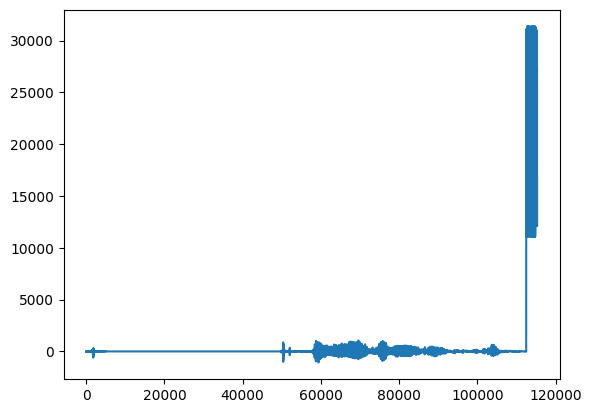

In [50]:
plt.plot(data.T)

In [51]:
display(Audio(data=data.T, rate=sample_rate))

In [40]:
display(Audio(data=data.T, rate=sample_rate))